# Introduction to C++

## Hello world

In [1]:
%%file hello.cpp

#include <iostream>

int main() {
    std::cout << "Hello, world!" << std::endl;
}

Overwriting hello.cpp


### Compilation

In [2]:
%%bash

g++ hello.cpp -o hello.exe

### Execution

In [3]:
%%bash

./hello.exe

Hello, world!


## Type conversions

In [4]:
%%file type.cpp
#include <iostream>
using std::cout;
using std::string;
using std::stoi;
        
int main() {
    char c = '3'; // A char is an integer type
    string s = "3"; // A string is not an integer type
    int i = 3;
    float f = 3;
    double d = 3;
    
    cout << c << "\n";
    cout << i << "\n";
    cout << f << "\n";
    cout << d << "\n";
    
    cout << "c + i is " << c + i << "\n";
    cout << "c + i is " << c - '0' + i << "\n";
    cout << "s + i is " << stoi(s) + i << "\n"; // Use std::stod to convert to double
}


Overwriting type.cpp


In [5]:
%%bash

g++ -o type.exe type.cpp -std=c++14

In [6]:
%%bash

./type.exe

3
3
3
3
c + i is 54
c + i is 6
s + i is 6


## Command line inputs

In [7]:
%%file command_args.cpp
#include <iostream>
#include <exception>
using std::cout;
using std::stoi;

int main(int argc, char *argv[]) {
    for (int i=0; i<argc; i++) {
        cout << i << ": " << argv[i];
        try {
            stoi(argv[i]);
            cout << " is an integer\n";
        } catch (std::exception& e) {
            cout << " is not an integer\n";
        }
    }
}

Overwriting command_args.cpp


In [8]:
%%bash

g++ -o command_args.exe command_args.cpp -std=c++14

In [9]:
%%bash

command_args.exe  1 2 hello goodbye

0: command_args.exe is not an integer
1: 1 is an integer
2: 2 is an integer
3: hello is not an integer
4: goodbye is not an integer


**Exercise 1**.

Write a C++ program ex01.cpp that takes a single number `n` as input on the command line and then prints the square of that number.

In [10]:
%%file ex01.cpp

#include <iostream>
#include <cmath>
using std::cout;
using std::stod;
        
int main(int argc, char *argv[]) {
    if (argc ==2 ) {
        double x = stod(argv[1]);
        cout << x*x << "\n";
    } else {
        cout << "Usage: ex01.exe <n>\n";
    }
}

Overwriting ex01.cpp


In [11]:
%%bash

g++ -o ex01.exe ex01.cpp -std=c++14

In [12]:
%%bash

./ex01.exe 5

25


## Functions

In [13]:
%%file func01.cpp

#include <iostream>

double add(double x, double y) {
    return x + y;
}

double mult(double x, double y) {
    return x * y;
}

int main() {
    double a = 3;
    double b = 4;
    
    std::cout << add(a, b) << std::endl;
    std::cout << mult(a, b) << std::endl;
    
}

Overwriting func01.cpp


### Compilation

In [14]:
%%bash

g++ -o func01.exe func01.cpp  -std=c++14

### Execution

In [15]:
%%bash

./func01.exe

7
12


## Header, implementation and driver files

### Header file(s)

In [16]:
%%file func02.hpp

double add(double x, double y);
double mult(double x, double y);

Overwriting func02.hpp


### Implementation file(s)

In [17]:
%%file func02.cpp

double add(double x, double y) {
    return x + y;
}

double mult(double x, double y) {
    return x * y;
}

Overwriting func02.cpp


### Driver program

In [18]:
%%file test_func02.cpp

#include <iostream>
#include "func02.hpp"

int main() {
    double a = 3;
    double b = 4;
    
    std::cout << add(a, b) << std::endl;
    std::cout << mult(a, b) << std::endl;
    
}

Overwriting test_func02.cpp


### Compilation

In [19]:
%%bash

g++ test_func02.cpp func02.cpp -o main02.exe

### Execution

In [20]:
%%bash

./test_func02.exe

7
12


## Using `make`

In [21]:
%%file Makefile

test_func02.exe: test_func02.o func02.o
	 g++ -o test_func02.exe main02.o func02.o
        
test_func02.o: test_func02.cpp func02.hpp
	 g++ -c test_func02.cpp
        
func02.o: func02.cpp
	 g++ -c func02.cpp

Overwriting Makefile


### Compilation

In [22]:
%%bash

make

g++ -c test_func02.cpp
g++ -c func02.cpp
g++ -o test_func02.exe main02.o func02.o


### Execution

In [23]:
%%bash

./test_func02.exe

7
12


## A more flexible Makefile

In [24]:
%%file Makefile2

CC=g++
CFLAGS=-Wall -std=c++14

test_func02.exe: test_func02.o func02.o
	 $(CC) $(CFLAGS) -o test_func02.exe test_func02.o func02.o
        
test_func02.o: test_func02.cpp func02.hpp
	 $(CC) $(CFLAGS) -c test_func02.cpp
        
func02.o: func02.cpp
	 $(CC) $(CFLAGS) -c func02.cpp

Overwriting Makefile2


### Compilation

Note that no re-compilation occurs!

In [25]:
%%bash

make -f Makefile2

make: `test_func02.exe' is up to date.


### Execution

In [26]:
%%bash 

./test_func02.exe

7
12


## Input and output

In [27]:
%%file data.txt
9 6

Overwriting data.txt


In [28]:
%%file io.cpp

#include <fstream>
#include "func02.hpp"

int main() {
    std::ifstream fin("data.txt");
    std::ofstream fout("result.txt");
    
    double a, b;
    
    fin >> a >> b;
    fin.close();
    
    fout << add(a, b) << std::endl;
    fout << mult(a, b) << std::endl;
    fout.close();
}

Overwriting io.cpp


In [29]:
%%bash

g++ io.cpp -o io.exe func02.cpp 

In [30]:
%%bash

./io.exe

In [31]:
! cat result.txt

15
54


## Arrays

In [32]:
%%file array.cpp

#include <iostream>
using std::cout;
using std::endl;
        
int main() {
    
    int N = 3;
    double counts[N];
    
    counts[0] = 1;
    counts[1] = 3;
    counts[2] = 3;

    double avg = (counts[0] + counts[1] + counts[2])/3;
    
    cout << avg << endl;    
}

Overwriting array.cpp


In [33]:
%%bash

g++ -o array.exe array.cpp 

In [34]:
%%bash

./array.exe

2.33333


## Loops

In [35]:
%%file loop.cpp

#include <iostream>
using std::cout;
using std::endl;

int main() 
{
    int x[] = {1, 2, 3, 4, 5};

    cout << "\nTraditional for loop\n";
    for (int i=0; i < sizeof(x)/sizeof(x[0]); i++) {
        cout << i << endl;
    }

    cout << "\nRanged for loop\n\n";
    for (auto &i : x) {
        cout << i << endl;
    }
}

Overwriting loop.cpp


In [36]:
%%bash

g++ -o loop.exe loop.cpp -std=c++14

In [37]:
%%bash

./loop.exe


Traditional for loop
0
1
2
3
4

Ranged for loop

1
2
3
4
5


## Function arguments

In [38]:
%%file func_arg.cpp

#include <iostream>
using std::cout;
using std::endl;
    
// Value parameter
void f1(int x) {
    x *= 2;
    cout << "In f1    : x=" << x << endl;
}

// Reference parameter
void f2(int &x) {
    x *= 2;
    cout << "In f2    : x=" << x << endl;
}

/* Note
If you want to avoid side effects 
but still use references to avoid a copy operation
use a const refernece like this to indicate that x cannot be changed

void f2(const int &x) 
*/

/* Note 
Raw pointers are prone to error and 
generally avoided in modern C++
See unique_ptr and shared_ptr
*/

// Raw pointer parameter
void f3(int *x) {
    *x *= 2;
    cout << "In f3    : x=" << *x << endl;
}
    
int main() {
    int x = 1;
    
    cout << "Before f1: x=" << x << "\n";
    f1(x);
    cout << "After f1 : x=" << x << "\n";
    
    cout << "Before f2: x=" << x << "\n";
    f2(x);
    cout << "After f2 : x=" << x << "\n";
    
    cout << "Before f3: x=" << x << "\n";
    f3(&x);
    cout << "After f3 : x=" << x << "\n";
}

Overwriting func_arg.cpp


In [39]:
%%bash

c++ -o func_arg.exe func_arg.cpp --std=c++14

In [40]:
%%bash 

./func_arg.exe

Before f1: x=1
In f1    : x=2
After f1 : x=1
Before f2: x=1
In f2    : x=2
After f2 : x=2
Before f3: x=2
In f3    : x=4
After f3 : x=4


**Exercise 2**.

Write a C++ program ex02.cpp that uses a function to calculate the 10th Fibonacci number. Here is the Python version to calculate the nth Fibonacci number for comparison.

In [41]:
def fib(n):
    a, b = 0, 1
    for i in range(n):
        a, b = b, a + b
    return a

In [42]:
fib(10)

55

In [43]:
%%file ex02.cpp

#include <iostream>
using std::cout;

// In practice, would probably use double rather than int
// as C++ ints will overflow when n is large.
int fib(int n) {
    int a = 0;
    int b = 1;
    int tmp;
    for (int i=0; i<n; i++) {
        tmp = a;
        a = b;
        b = tmp + b;
    }
    return a;
}
        
int main() {
    cout << fib(10) << "\n";    
}

Overwriting ex02.cpp


In [44]:
%%bash

g++ -o ex02.exe ex02.cpp -std=c++14

In [45]:
%%bash

./ex02.exe

55


## Anonymous functions

In [46]:
%%file lambda.cpp

#include <iostream>
using std::cout;
using std::endl;

int main() {

    int a = 3, b = 4;
    int c = 0;

    // Lambda function with no capture
    auto add1 = [] (int a, int b) { return a + b; };
    // Lambda function with value capture
    auto add2 = [c] (int a, int b) { return c * (a + b); };
    // Lambda funciton with reference capture   
    auto add3 = [&c] (int a, int b) { return c * (a + b); };

    // Change value of c after function definition
    c += 5;

    cout << "Lambda function\n";
    cout << add1(a, b) <<  endl;
    cout << "Lambda function with value capture\n";
    cout << add2(a, b) <<  endl;
    cout << "Lambda function with reference capture\n";
    cout << add3(a, b) <<  endl;

}

Overwriting lambda.cpp


In [47]:
%%bash

c++ -o lambda.exe lambda.cpp --std=c++14

In [48]:
%%bash

./lambda.exe

Lambda function
7
Lambda function with value capture
0
Lambda function with reference capture
35


## Function pointers

In [49]:
%%file func_pointer.cpp

#include <iostream>
#include <vector>

using std::cout;
using std::endl;
using std::function;
using std::vector;

int main() 
{
    cout << "\nUsing generalized function pointers\n";
    using func = function<double(double, double)>;

    auto f1 = [](double x, double y) { return x + y; };
    auto f2 = [](double x, double y) { return x * y; };
    auto f3 = [](double x, double y) { return x + y*y; };

    double x = 3, y = 4;

    vector<func> funcs = {f1, f2, f3,};

    for (auto& f : funcs) {
        cout << f(x, y) << "\n";
    }
}

Overwriting func_pointer.cpp


In [50]:
%%bash

g++ -o func_pointer.exe func_pointer.cpp -std=c++14

In [51]:
%%bash

./func_pointer.exe


Using generalized function pointers
7
12
19


## Generic programming with templates

In [52]:
%%file template.cpp

#include <iostream>

template<typename T>
T add(T a, T b) {
    return a + b;
}

int main() {
    int m =2, n =3;
    double u = 2.5, v = 4.5;
    
    std::cout << add(m, n) << std::endl;
    std::cout << add(u, v) << std::endl;
}

Overwriting template.cpp


In [53]:
%%bash

g++ -o template.exe template.cpp

In [54]:
%%bash

./template.exe

5
7


## Standard template library (STL)

In [55]:
%%file stl.cpp

#include <iostream>
#include <vector>
#include <map>
#include <unordered_map>

using std::vector;
using std::map;
using std::unordered_map;
using std::string;
using std::cout;
using std::endl;
        
struct Point{
    int x;
    int y;
    
    Point(int x_, int y_) : 
      x(x_), y(y_) {};
};

int main() {
    vector<int> v1 = {1,2,3};
    v1.push_back(4);
    v1.push_back(5);
    
    cout << "Vecotr<int>" << endl;
    for (auto n: v1) {
        cout << n << endl;
    }
    cout << endl;
    
    vector<Point> v2;
    v2.push_back(Point(1, 2));
    v2.emplace_back(3,4);
    
    cout <<  "Vector<Point>" << endl;
    for (auto p: v2) {
        cout << "(" << p.x << ", " << p.y << ")" << endl;
    }
    cout << endl;
    
    map<string, int> v3 = {{"foo", 1}, {"bar", 2}};
    v3["hello"] = 3;
    v3.insert({"goodbye", 4});    
    
    // Note the a C++ map is ordered
    // Note using (traditional) iterators instead of ranged for loop
    cout << "Map<string, int>" << endl;
    for (auto iter=v3.begin(); iter != v3.end(); iter++) {
        cout << iter->first << ": " << iter->second << endl;
    }
    cout << endl;
    
    unordered_map<string, int> v4 = {{"foo", 1}, {"bar", 2}};
    v4["hello"] = 3;
    v4.insert({"goodbye", 4});    
    
    // Note theunordered_map is similar to Python' dict.'
    // Note using (traditional) iterators instead of ranged for loop
    cout << "Unordered_map<string, int>" << endl;
    for (auto i: v4) {
        cout << i.first << ": " << i.second << endl;
    }
    cout << endl;
}

Overwriting stl.cpp


In [56]:
%%bash

g++ -o stl.exe stl.cpp -std=c++14

In [57]:
%%bash

./stl.exe

Vecotr<int>
1
2
3
4
5

Vector<Point>
(1, 2)
(3, 4)

Map<string, int>
bar: 2
foo: 1
goodbye: 4
hello: 3

Unordered_map<string, int>
goodbye: 4
hello: 3
bar: 2
foo: 1



**Exercise 3**.

Write a C++ program ex03.cpp that implements a map(func, xs) function where xs is an vector of integers and func is any function that takes an integer and returns another integer. Map should return an vector of integers. Test it on a vector [1,2,3,4] and an anonymous function that adds 3 to its input argument.

In [58]:
%%file ex03.cpp

#include <iostream>
#include <vector>
#include <functional>
using std::cout;
using std::vector;
using std::function;    

using func = function<int(int)>;
        
vector<int> map(func f, vector<int> xs) {
    vector<int> res;
    for (auto x: xs) {
        res.push_back(f(x));
    }
    return res;
}

int main() {
    vector<int> xs = {1,2,3,4};
    vector<int> ys = map([](int x){ return 3+x;}, xs);
    for (auto y: ys) {
        cout << y << "\n";
    }
}

Overwriting ex03.cpp


In [59]:
%%bash

g++ -o ex03.exe ex03.cpp -std=c++14

In [60]:
%%bash

./ex03.exe

4
5
6
7


## STL algorithms

In [61]:
%%file stl_algorithm.cpp

#include <vector>
#include <iostream>
#include <numeric>

using std::cout;
using std::endl;
using std::vector;
using std::begin;
using std::end;
        
int main() {
    vector<int> v(10);

    // iota is somewhat like range
    std::iota(v.begin(), v.end(), 1);
    
    for (auto i: v) {
        cout << i << " ";
    }
    cout << endl;
    
    // C++ version of reduce    
    cout << std::accumulate(begin(v), end(v), 0) << endl;
    
    // Accumulate with lambda
    cout << std::accumulate(begin(v), end(v), 1, [](int a, int b){return a * b; }) << endl;
}

Overwriting stl_algorithm.cpp


In [62]:
%%bash

g++ -o stl_algorithm.exe stl_algorithm.cpp -std=c++14

In [63]:
%%bash

./stl_algorithm.exe

1 2 3 4 5 6 7 8 9 10 
55
3628800


## Random numbers

In [64]:
%%file random.cpp

#include <iostream>
#include <random>

using std::cout;
using std::default_random_engine;
using std::uniform_int_distribution;
using std::poisson_distribution;
using std::student_t_distribution;
        
// start random number engine with fixed seed
default_random_engine re{12345};

uniform_int_distribution<int> uniform(1,6); // lower and upper bounds
poisson_distribution<int> poisson(30); // rate
student_t_distribution<double> t(10); // degrees of freedom      

int main() 
{
    cout << "\nGenerating random numbers\n";

    auto runif = bind (uniform, re);
    auto rpois = bind(poisson, re);
    auto rt = bind(t, re);

    for (int i=0; i<10; i++) {
        cout << runif() << ", " << rpois() <<  ", " << rt() << "\n";

    }
}

Overwriting random.cpp


In [65]:
%%bash

g++ -o random.exe random.cpp -std=c++14

In [66]:
%%bash

./random.exe


Generating random numbers
3, 30, 0.0796641
5, 38, 0.163947
3, 26, -0.570003
6, 27, 0.872475
6, 33, -0.260322
2, 28, 0.798292
1, 22, 0.00164128
4, 29, 0.633913
5, 41, 1.00468
6, 31, -0.00420647


**Exercise 4**

Generate 100 numbers from $N(100, 15)$ in C++. Write to a plain text file that can be read in Python. Plot a normalized histogram of the numbers.

In [67]:
%%file ex04.cpp

#include <iostream>
#include <fstream>
#include <random>

using std::cout;
using std::endl;
using std::ofstream;
        
using std::default_random_engine;
using std::normal_distribution;
        
// start random number engine with fixed seed
default_random_engine re{12345};

normal_distribution<double> norm(100, 15); // mean and standard deviation
auto rnorm = bind(norm, re);  

int main() {
    ofstream fout("norm_data.txt");
    
    for (int i=0; i<100; i++) {
        fout << rnorm() << "\n";
    }
}

Overwriting ex04.cpp


In [68]:
%%bash 

g++ -o ex04.exe ex04.cpp -std=c++14

In [69]:
%%bash

./ex04.exe

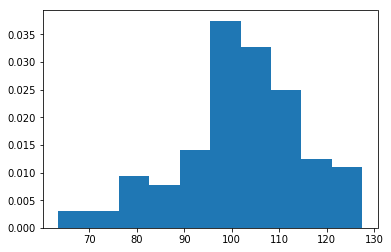

In [70]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('norm_data.txt')
plt.hist(data, density=True)
plt.show()

## Numerics

Using the Eigen library.

In [71]:
%%file numeric.cpp
#include <iostream>
#include <fstream>
#include <random>
#include <Eigen/Dense>

using std::cout;
using std::endl;
using std::ofstream;
        
using std::default_random_engine;
using std::normal_distribution;
        
// start random number engine with fixed seed
default_random_engine re{12345};

normal_distribution<double> norm(5,2); // mean and standard deviation
auto rnorm = bind(norm, re);  
                              
int main() 
{
    using namespace Eigen;

    VectorXd x1(6);
    x1 << 1, 2, 3, 4, 5, 6;
    VectorXd x2 = VectorXd::LinSpaced(6, 1, 2);
    VectorXd x3 = VectorXd::Zero(6);
    VectorXd x4 = VectorXd::Ones(6);
    VectorXd x5 = VectorXd::Constant(6, 3);
    VectorXd x6 = VectorXd::Random(6);
    
    double data[] = {6,5,4,3,2,1};
    Map<VectorXd> x7(data, 6);

    VectorXd x8 = x6 + x7;
    
    MatrixXd A1(3,3);
    A1 << 1 ,2, 3,
          4, 5, 6,
          7, 8, 9;
    MatrixXd A2 = MatrixXd::Constant(3, 4, 1);
    MatrixXd A3 = MatrixXd::Identity(3, 3);
    
    Map<MatrixXd> A4(data, 3, 2);
    
    MatrixXd A5 = A4.transpose() * A4;
    MatrixXd A6 = x7 * x7.transpose();
    MatrixXd A7 = A4.array() * A4.array();
    MatrixXd A8 = A7.array().log();
    MatrixXd A9 = A8.unaryExpr([](double x) { return exp(x); });
    MatrixXd A10 = MatrixXd::Zero(3,4).unaryExpr([](double x) { return rnorm(); });

    VectorXd x9 = A1.colwise().norm();
    VectorXd x10 = A1.rowwise().sum();
    
    MatrixXd A11(x1.size(), 3);
    A11 << x1, x2, x3;
    
    MatrixXd A12(3, x1.size());
    A12 << x1.transpose(),
          x2.transpose(),
          x3.transpose();
    
    JacobiSVD<MatrixXd> svd(A10, ComputeThinU | ComputeThinV);
    
    
    cout << "x1: comman initializer\n" << x1.transpose() << "\n\n";
    cout << "x2: linspace\n" << x2.transpose() << "\n\n";
    cout << "x3: zeors\n" << x3.transpose() << "\n\n";
    cout << "x4: ones\n" << x4.transpose() << "\n\n";
    cout << "x5: constant\n" << x5.transpose() << "\n\n";
    cout << "x6: rand\n" << x6.transpose() << "\n\n";
    cout << "x7: mapping\n" << x7.transpose() << "\n\n";
    cout << "x8: element-wise addition\n" << x8.transpose() << "\n\n";
    
    cout << "max of A1\n";
    cout << A1.maxCoeff() << "\n\n";
    cout << "x9: norm of columns of A1\n" << x9.transpose() << "\n\n";
    cout << "x10: sum of rows of A1\n" << x10.transpose() << "\n\n"; 
    
    cout << "head\n";
    cout << x1.head(3).transpose() << "\n\n";
    cout << "tail\n";
    cout << x1.tail(3).transpose() << "\n\n";
    cout << "slice\n";
    cout << x1.segment(2, 3).transpose() << "\n\n";
    
    cout << "Reverse\n";
    cout << x1.reverse().transpose() << "\n\n";
    
    cout << "Indexing vector\n";
    cout << x1(0);
    cout << "\n\n";
    
    cout << "A1: comma initilizer\n";
    cout << A1 << "\n\n";
    cout << "A2: constant\n";
    cout << A2 << "\n\n";
    cout << "A3: eye\n";
    cout << A3 << "\n\n";
    cout << "A4: mapping\n";
    cout << A4 << "\n\n";
    cout << "A5: matrix multiplication\n";
    cout << A5 << "\n\n";
    cout << "A6: outer product\n";
    cout << A6 << "\n\n";    
    cout << "A7: element-wise multiplication\n";
    cout << A7 << "\n\n";     
    cout << "A8: ufunc log\n";
    cout << A8 << "\n\n";  
    cout << "A9: custom ufucn\n";
    cout << A9 << "\n\n";  
    cout << "A10: custom ufunc for normal deviates\n";
    cout << A10 << "\n\n";  
    cout << "A11: np.c_\n";
    cout << A11 << "\n\n";  
    cout << "A12: np.r_\n";
    cout << A12 << "\n\n";      
    
    cout << "2x2 block startign at (0,1)\n";
    cout << A1.block(0,1,2,2) << "\n\n";
    cout << "top 2 rows of A1\n";
    cout << A1.topRows(2) << "\n\n";
    cout << "bottom 2 rows of A1";
    cout << A1.bottomRows(2) << "\n\n";
    cout << "leftmost 2 cols of A1";
    cout << A1.leftCols(2) << "\n\n";
    cout << "rightmost 2 cols of A1";
    cout << A1.rightCols(2) << "\n\n";

    cout << "Diagonal elements of A1\n";
    cout << A1.diagonal() << "\n\n";
    A1.diagonal() = A1.diagonal().array().square();
    cout << "Transforming diagonal eelemtns of A1\n";
    cout << A1 << "\n\n";
    
    cout << "Indexing matrix\n";
    cout << A1(0,0) << "\n\n";
    
    cout << "singular values\n";
    cout << svd.singularValues() << "\n\n";
    
    cout << "U\n";
    cout << svd.matrixU() << "\n\n";
    
    cout << "V\n";
    cout << svd.matrixV() << "\n\n";
}

Overwriting numeric.cpp


In [72]:
%%bash

g++ -o numeric.exe numeric.cpp -std=c++14 -I/usr/local/include/eigen3

In [73]:
%%bash

./numeric.exe

x1: comman initializer
1 2 3 4 5 6

x2: linspace
  1 1.2 1.4 1.6 1.8   2

x3: zeors
0 0 0 0 0 0

x4: ones
1 1 1 1 1 1

x5: constant
3 3 3 3 3 3

x6: rand
 -0.999984  -0.736924   0.511211 -0.0826997  0.0655345  -0.562082

x7: mapping
6 5 4 3 2 1

x8: element-wise addition
 5.00002  4.26308  4.51121   2.9173  2.06553 0.437918

max of A1
9

x9: norm of columns of A1
8.12404 9.64365  11.225

x10: sum of rows of A1
 6 15 24

head
1 2 3

tail
4 5 6

slice
3 4 5

Reverse
6 5 4 3 2 1

Indexing vector
1

A1: comma initilizer
1 2 3
4 5 6
7 8 9

A2: constant
1 1 1 1
1 1 1 1
1 1 1 1

A3: eye
1 0 0
0 1 0
0 0 1

A4: mapping
6 3
5 2
4 1

A5: matrix multiplication
77 32
32 14

A6: outer product
36 30 24 18 12  6
30 25 20 15 10  5
24 20 16 12  8  4
18 15 12  9  6  3
12 10  8  6  4  2
 6  5  4  3  2  1

A7: element-wise multiplication
36  9
25  4
16  1

A8: ufunc log
3.58352 2.19722
3.21888 1.38629
2.77259       0

A9: custom ufucn
36  9
25  4
16  1

A10: custom ufunc for normal deviates
5.17237 3.73572

### Check SVD

In [74]:
import numpy as np

A10 = np.array([
    [5.17237, 3.73572, 6.29422, 6.55268],
    [5.33713, 3.88883, 1.93637, 4.39812],
    [8.22086, 6.94502, 6.36617,  6.5961]
])

U, s, Vt = np.linalg.svd(A10, full_matrices=False)

In [75]:
s

array([19.50007376,  2.80674189,  1.29869186])

In [76]:
U

array([[-0.55849978, -0.75124103, -0.3517313 ],
       [-0.40681745,  0.61759344, -0.67311062],
       [-0.72289526,  0.2328417 ,  0.65054376]])

In [77]:
Vt.T

array([[-0.56424535,  0.47194895, -0.04907563],
       [-0.44558625,  0.43195279,  0.45157518],
       [-0.45667231, -0.73048295,  0.48064272],
       [-0.52395657, -0.23890509, -0.75010267]])